## Follow-up on requests for food aid at 211
Montreal Follow-Up on Requests for Food Aid at 211 is a service of the City of Montreal's to address food insecurity and assist residents in accessing food aid. Managed in collaboration with 211 Greater Montreal, a comprehensive referral service, the program ensures that individuals and families in need can receive timely and appropriate assistance.
The dataset presents all requests (telephone, chat and email) made to 211 Greater Montreal that are related to food in 2021 and 2022 as part of the food insecurity project funded by the City of Montreal 

The data is provided as csv. 

### Steps that are taken
- Load the csv file containing requests data and perform some analysis on the data
- Load the csv file containing follow-up data data and perform some analysis on the data
- Load the csv file containing needs / requirements data data and perform some analysis on the data
- Load the shapefile containing business data and perform some analysis on the data

### Data source
- https://donnees.Montreal.ca/dataset/demandes-aide-alimentaire
- Source: Open Data Portal Montreal
- Publisher: 211 Greater Montreal
- Accessed: 12.11.2023

In [1]:
# Importing required libraries for geospatial analysis, data manipulation, and visualization.
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns                 # For data visualization

from openpyxl import Workbook

# Suppress warnings for better readability of the output
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/work/Z_FINAL_Food_aid_request


In [3]:
# Ensure the "Figures" directory exists
output_folder = "Figures"
os.makedirs(output_folder, exist_ok=True)

In [4]:
# Define the folder path (you can use an absolute or relative path)
folder_path = "/home/jovyan/work/Data/"

# Set the environment variable, for example 'MY_FOLDER'
os.environ["Data_folder"] = folder_path

# You can verify it's set by printing it
print("Environment variable Data_folder is set to:", os.environ["Data_folder"])

Environment variable Data_folder is set to: /home/jovyan/work/Data/


In [5]:
# Get the folder path from the environment variable
folder_path = os.environ.get("Data_folder")
if not folder_path:
    raise ValueError("The environment variable Data_folder is not set.")

### Need to check later if we want to use the _EN.csv or if we can work with the original French files and to the needed translation in the script

In [6]:
# Load datasets
# Loading CSV and shapefile data for analysis.

# Load requests for food aid
file_path = os.path.join(folder_path, "Food_aid_requests/demandes-aide-alimentaire_EN.csv")
requests = gpd.read_file(file_path)
# file_path = os.path.join(folder_path, "Food_aid_requests/demandes-aide-alimentaire.csv")
# demandes = gpd.read_file('Data/demandes-aide-alimentaire.csv')

# Load follow-up data
file_path = os.path.join(folder_path, "Food_aid_requests/suivis-aide-alimentaire_EN.csv")
follow_up = gpd.read_file(file_path)
# file_path = os.path.join(folder_path, "Food_aid_requests/suivis-aide-alimentaire.csv")
# suivis = gpd.read_file(file_path)

# Load needs / requirements data
file_path = os.path.join(folder_path, "Food_aid_requests/besoins-aide-alimentaire_EN.csv")
needs = gpd.read_file(file_path)
# file_path = os.path.join(folder_path, "Food_aid_requests/besoins-aide-alimentaire.csv")
# besoins = gpd.read_file(file_path)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [7]:
# Display the first few rows of the dataframe requests for food aid to understand its structure.
requests.head(5)

,ID_Call,Date,Province,Municipal_district,Region,Age,Gender,Mode_of_communication,Language,geometry
0,82726878,2021-01-02,QC,Le Plateau-Mont-Royal,Montreal,37,Male,Phone calls,French,None
1,82721953,2021-01-02,QC,Villeray-Saint-Michel-Parc-Extension,Montreal,44,Family/Couple/Groups,Chat,French,None
2,82729195,2021-01-02,QC,Lachine,Montréal,36,Female,Clavardage,English,None
3,82749692,2021-01-03,QC,Ahuntsic-Cartierville,Montreal,26,Female,Phone calls,French,None
4,82756689,2021-01-03,QC,Ahuntsic-Cartierville,Montreal,34,Female,Phone calls,French,None


In [8]:
# Display the first few rows of the dataframe follow-up data to understand its structure.
follow_up.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,,,,,,,,,,,None
1,91805422,Social assistance,Secondary,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help among resources referred by 211...,Same day,After 1 week or more,Yes at least once a month,4,Cost too high,None
2,91895861,,,,,,,,,,,,,None
3,91950631,Disability plans,Secondary,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Same day,,,,,None
4,92021668,Social assistance,Primary,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help among resources referred by 211...,,,Yes at least once a month,5,,None


In [9]:
# Display the first few rows of the dataframe needs / requirements data to understand its structure.
needs.head(5)

,ID_Call,Taxonomy_Code,Taxonomy_Nom,Needs_fulfilled,Reason_need_not_met,ID_Needs,geometry
0,82721953,BD-1800.2000,Food banks,False,,23365009,None
1,82749692,BD-1800.2000,Food banks,False,,23372741,None
2,82756689,BD-1800.2000,Food banks,False,,23375191,None
3,82771851,BD-1800.2000,Food banks,False,,23379262,None
4,82772233,BD-1800.2000,Food banks,False,,23379208,None


In [10]:
# Load borough boundaries and preview unique names
# original files including information (CODEID, NOM, CODEMAMH, NUM, ABREV, TYPE, COMMENT, DATEMODIF, geometry)
file_path = os.path.join(folder_path, "Administrative_boundaries/limites-administratives-agglomeration.shp")

# Files including infomation (CODEID, NOM, NOM_OFFICI, CODEMAMH, CODE_3C, NUM, ABREV, TYPE, COMMENT, DATEMODIF, geometry)
#file_path = os.path.join(folder_path, "Administrative_boundaries/limites-administratives-agglomeration_edit.shp")
boroughs = gpd.read_file(file_path)
boroughs.head(3)

,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428..."
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464..."
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ..."


In [11]:
# Convert 'ID_Call' to integer for compatibility
follow_up['ID_Call'] = follow_up['ID_Call'].astype(int)

# Filter for a specific call ID in follow-up data
column_follow_up = follow_up[follow_up['ID_Call'] == 91805422]
column_follow_up.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
1,91805422,Social assistance,Secondary,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help among resources referred by 211...,Same day,After 1 week or more,Yes at least once a month,4,Cost too high,None


In [12]:
# Repeat the process for the requests data
requests['ID_Call'] = requests['ID_Call'].astype(int)
column_requests = requests[requests['ID_Call'] == 91805422]
requests.head(5)

,ID_Call,Date,Province,Municipal_district,Region,Age,Gender,Mode_of_communication,Language,geometry
0,82726878,2021-01-02,QC,Le Plateau-Mont-Royal,Montreal,37,Male,Phone calls,French,None
1,82721953,2021-01-02,QC,Villeray-Saint-Michel-Parc-Extension,Montreal,44,Family/Couple/Groups,Chat,French,None
2,82729195,2021-01-02,QC,Lachine,Montréal,36,Female,Clavardage,English,None
3,82749692,2021-01-03,QC,Ahuntsic-Cartierville,Montreal,26,Female,Phone calls,French,None
4,82756689,2021-01-03,QC,Ahuntsic-Cartierville,Montreal,34,Female,Phone calls,French,None


In [13]:
# Analyze unique values
# Identifying unique borough names in requests and borough datasets for mapping.

# Unique municipal districts in the requests dataset
unique_values_requests = requests['Municipal_district'].unique()
print(unique_values_requests)

['Le Plateau-Mont-Royal' 'Villeray-Saint-Michel-Parc-Extension' 'Lachine'
 'Ahuntsic-Cartierville' 'Côte-Saint-Luc' 'Le Sud-Ouest'
 'Mercier-Hochelaga-Maisonneuve' 'Saint-Léonard'
 'Côte-des-Neiges-Notre-Dame-de-Grâce' 'Montréal-Nord' 'Pointe-Claire'
 'Rosemont-La Petite-Patrie' 'Dollard-Des Ormeaux' 'Saint-Laurent'
 'Ville-Marie' 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Montréal-Est'
 'Verdun' 'Montreal-North' 'Anjou' 'Mont-Royal' 'Pierrefonds-Roxboro'
 'LaSalle' 'Inconnu-Montréal' 'Sainte-Anne-de-Bellevue' 'Montréal'
 'Outremont' 'Unknown-Montreal' 'Kirkland' 'Dorval' 'Montreal'
 "L'Île-Bizard-Sainte-Geneviève" 'Hampstead' 'Beaconsfield' 'Westmount'
 'Montreal-West' '' "Baie-D'Urfé"
 'Rivière-des-Prairies—Pointe-aux-Trembles'
 'Mercier—Hochelaga-Maisonneuve' 'Rosemont—La Petite-Patrie'
 'Côte-des-Neiges—Notre-Dame-de-Grâce' 'Montréal-Ouest']


In [14]:
# Unique municipal districts in the borough dataset
unique_values_boroughs = boroughs['NOM'].unique()
unique_values_boroughs_sorted = sorted(unique_values_boroughs, key=str.lower)
print(unique_values_boroughs_sorted)

['Ahuntsic-Cartierville', 'Anjou', "Baie-D'Urfé", 'Beaconsfield', 'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Côte-Saint-Luc', 'Dollard-des-Ormeaux', 'Dorval', 'Hampstead', 'Kirkland', "L'Île-Bizard-Sainte-Geneviève", "L'Île-Dorval", 'Lachine', 'LaSalle', 'Le Plateau-Mont-Royal', 'Le Sud-Ouest', 'Mercier-Hochelaga-Maisonneuve', 'Mont-Royal', 'Montréal-Est', 'Montréal-Nord', 'Montréal-Ouest', 'Outremont', 'Pierrefonds-Roxboro', 'Pointe-Claire', 'Rivière-des-Prairies-Pointe-aux-Trembles', 'Rosemont-La Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard', 'Sainte-Anne-de-Bellevue', 'Senneville', 'Verdun', 'Ville-Marie', 'Villeray-Saint-Michel-Parc-Extension', 'Westmount']


In [15]:
# Harmonizing district names
# Correct discrepancies in district names between datasets.

requests['Municipal_district'] = requests['Municipal_district'].replace({
    'Rosemont—La Petite-Patrie': 'Rosemont-La Petite-Patrie',
    'Côte-des-Neiges—Notre-Dame-de-Grâce': 'Côte-des-Neiges-Notre-Dame-de-Grâce',
    'Rivière-des-Prairies—Pointe-aux-Trembles': 'Rivière-des-Prairies-Pointe-aux-Trembles',
    'Montréal-Nord': 'Montreal-North',
    'Montréal-Ouest': 'Montreal-West',
    'Mercier—Hochelaga-Maisonneuve': 'Mercier-Hochelaga-Maisonneuve'
})

# Compare and identify differences between datasets
unique_values_requests = requests['Municipal_district'].unique()
unique_values_boroughs = boroughs['NOM'].unique()

set_requests = set(unique_values_requests)
set_boroughs = set(unique_values_boroughs)

equal = sorted(set_requests.intersection(set_boroughs))

differences_requests = sorted(set_requests.difference(set_boroughs))
differences_boroughs = sorted(set_boroughs.difference(set_requests))

print("\nCommon Boroughs:\n", equal)
print("\nMissing in requests dataset:\n", differences_requests)
print("\nMissing in boroughs dataset:\n", differences_boroughs)



Common Boroughs:
 ['Ahuntsic-Cartierville', 'Anjou', "Baie-D'Urfé", 'Beaconsfield', 'Côte-Saint-Luc', 'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Dorval', 'Hampstead', 'Kirkland', "L'Île-Bizard-Sainte-Geneviève", 'LaSalle', 'Lachine', 'Le Plateau-Mont-Royal', 'Le Sud-Ouest', 'Mercier-Hochelaga-Maisonneuve', 'Mont-Royal', 'Montréal-Est', 'Outremont', 'Pierrefonds-Roxboro', 'Pointe-Claire', 'Rivière-des-Prairies-Pointe-aux-Trembles', 'Rosemont-La Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard', 'Sainte-Anne-de-Bellevue', 'Verdun', 'Ville-Marie', 'Villeray-Saint-Michel-Parc-Extension', 'Westmount']

Missing in requests dataset:
 ['', 'Dollard-Des Ormeaux', 'Inconnu-Montréal', 'Montreal', 'Montreal-North', 'Montreal-West', 'Montréal', 'Unknown-Montreal']

Missing in boroughs dataset:
 ['Dollard-des-Ormeaux', "L'Île-Dorval", 'Montréal-Nord', 'Montréal-Ouest', 'Senneville']


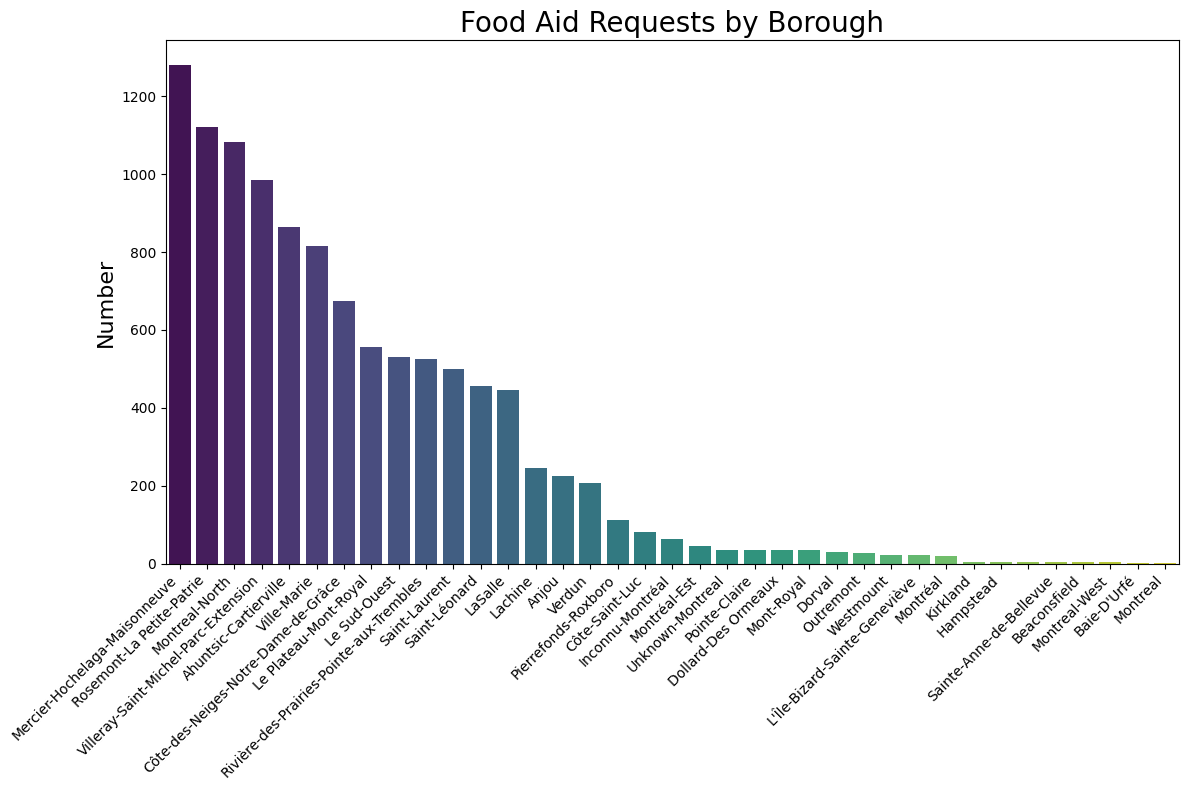

In [16]:
# Filter the requests DataFrame to get counts by 'Municipal_district'
requests_counts = requests['Municipal_district'].value_counts().reset_index()
requests_counts.columns = ['Municipal_district', 'Requests']  # Rename columns for clarity
requests_counts_sorted = requests_counts.sort_values(by='Requests', ascending=False)  # Sort by number of requests

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Municipal_district', y='Requests', data=requests_counts_sorted, palette='viridis')

# Add title, labels, and adjust ticks
plt.title('Food Aid Requests by Borough', size=20)
plt.xlabel('')  # Remove x-axis label for cleaner look
plt.ylabel('Number', size=16)
plt.xticks(rotation=45, ha='right')  # Rotate tick labels for better readability

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure in the "Figures" folder
output_folder = "Figures"  # Specify the output folder
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
output_path = os.path.join(output_folder, 'Number_of_requests_by_borough.svg')
plt.savefig(output_path, format='svg', dpi=300)

# Show the plot
plt.show()

In [17]:
# Spatial analysis
# Analyze requests per borough area and adjust for business counts.

# Convert borough CRS for spatial consistency
boroughs = boroughs.to_crs(epsg=32618)
print("Nové CRS:", boroughs.crs)

Nové CRS: EPSG:32618


In [18]:
# Show boroughs area
boroughs['Area'] = boroughs.geometry.area
print(boroughs[['NOM', 'Area']])

                                         NOM          Area
0                                    LaSalle  2.520019e+07
1                        Dollard-des-Ormeaux  1.508438e+07
2                             Côte-Saint-Luc  6.805590e+06
3       Villeray-Saint-Michel-Parc-Extension  1.647498e+07
4                  Rosemont-La Petite-Patrie  1.588024e+07
5                                  Hampstead  1.764602e+06
6                                 Senneville  1.857903e+07
7                      Le Plateau-Mont-Royal  8.141402e+06
8                    Sainte-Anne-de-Bellevue  1.117477e+07
9                             Montréal-Ouest  1.418997e+06
10       Côte-des-Neiges-Notre-Dame-de-Grâce  2.147973e+07
11             L'Île-Bizard-Sainte-Geneviève  3.630217e+07
12                              Beaconsfield  2.467103e+07
13                                     Anjou  1.388947e+07
14                                    Verdun  2.228437e+07
15                              Le Sud-Ouest  1.809391e+

In [19]:
# Add area calculations in km²
boroughs['Area_km2'] = boroughs['Area'] / 1000000
print(boroughs[['NOM', 'Area_km2']])

                                         NOM   Area_km2
0                                    LaSalle  25.200191
1                        Dollard-des-Ormeaux  15.084379
2                             Côte-Saint-Luc   6.805590
3       Villeray-Saint-Michel-Parc-Extension  16.474981
4                  Rosemont-La Petite-Patrie  15.880237
5                                  Hampstead   1.764602
6                                 Senneville  18.579030
7                      Le Plateau-Mont-Royal   8.141402
8                    Sainte-Anne-de-Bellevue  11.174771
9                             Montréal-Ouest   1.418997
10       Côte-des-Neiges-Notre-Dame-de-Grâce  21.479727
11             L'Île-Bizard-Sainte-Geneviève  36.302174
12                              Beaconsfield  24.671034
13                                     Anjou  13.889465
14                                    Verdun  22.284366
15                              Le Sud-Ouest  18.093908
16             Mercier-Hochelaga-Maisonneuve  27

In [20]:
# Merge incident counts with borough data
counts = requests['Municipal_district'].value_counts().reset_index()
counts.columns = ['NOM', 'Count']
merged_data = pd.merge(counts, boroughs[['NOM', 'Area_km2']], on='NOM', how='left')
# Calculate count per area
merged_data['Weighted_count_area'] = merged_data['Count'] / merged_data['Area_km2']

## Here we should integrate a count per people. Therefore we need the cencus of the people per borough as .geojson

This will be a request per population, and represents the percentage of the population in the borough that ased for food aid.

In [21]:
# Display results
merged_data.head()

,NOM,Count,Area_km2,Weighted_count_area
0,Mercier-Hochelaga-Maisonneuve,1280,27.398008,46.718724
1,Rosemont-La Petite-Patrie,1122,15.880237,70.653857
2,Montreal-North,1084,NaN,NaN
3,Villeray-Saint-Michel-Parc-Extension,984,16.474981,59.726929
4,Ahuntsic-Cartierville,865,25.568442,33.830767


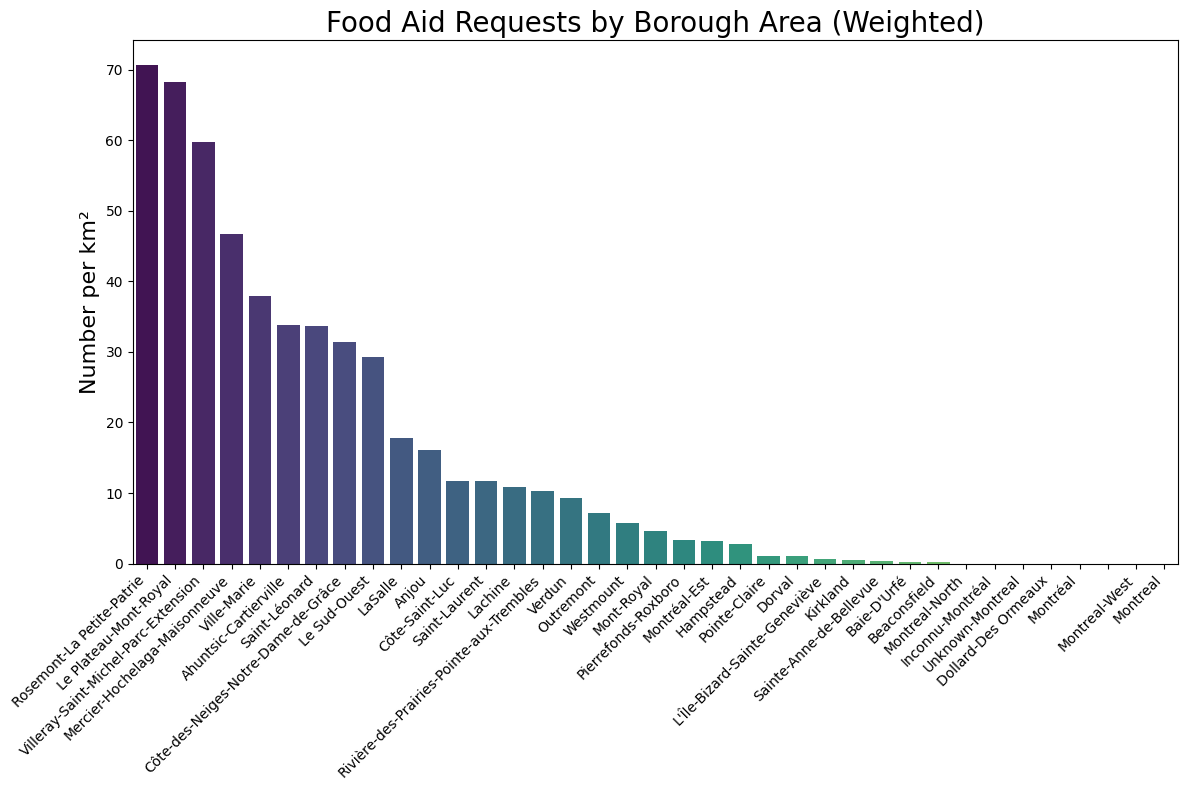

In [22]:
# Sort the data by 'Weighted_count_area' in descending order
sorted_data = merged_data.sort_values('Weighted_count_area', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='NOM', y='Weighted_count_area', data=sorted_data, palette='viridis')

# Add title, labels, and adjust ticks
plt.title('Food Aid Requests by Borough Area (Weighted)', size=20)
plt.xlabel('')  # Remove x-axis label for cleaner look
plt.ylabel('Number per km²', size=16)
plt.xticks(rotation=45, ha='right')  # Rotate tick labels for better readability

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure in the "Figures" folder
output_folder = "Figures"  # Specify the output folder
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
output_path = os.path.join(output_folder, 'Food_aid_requests_by_borough_area.svg')
plt.savefig(output_path, format='svg', dpi=300)

# Show the plot
plt.show()


In [23]:
# Loading business data
# Load the shapefile containing business information for analysis.
# businesses = gpd.read_file('Data/businesses.shp')
file_path = os.path.join(folder_path, "Food_establishments/businesses.shp")
businesses = gpd.read_file(file_path)
# Preview the first few rows of the businesses data
businesses.head(5)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990)
1,135,PROVI-TOT,9128 Boulevard Perras,Montréal,"Québec, Canada",Épicerie avec préparation,Fermé changement d'exploitant,20090821,45.650352,-73.577726,298741.88,5056720.54,POINT (298741.880 5056720.540)
2,138,LE PETIT TABLIER,690 Rue Sherbrooke Ouest,Montréal,"Québec, Canada",Restaurant,Fermé changement d'exploitant,20090306,45.504673,-73.57376600000001,299035.65,5040530.65,POINT (299035.650 5040530.650)
3,140,RESTO-PUB MARCO POLO,7985 Avenue Marco-Polo,Montréal,"Québec, Canada",Brasserie,Fermé,20230914,45.62598,-73.583592,298281.88,5054012.39,POINT (298281.880 5054012.390)
4,146,BISTRO OLA KALA,522 Rue Jarry Ouest,Montréal,"Québec, Canada","Bar salon, taverne",Fermé changement d'exploitant,20120921,45.531975,-73.635054,294251.47,5043570.93,POINT (294251.470 5043570.930)


In [24]:
# Filter businesses that are currently open
open_businesses = businesses[businesses['statut'] == 'Ouvert']
# Display the shape of the filtered data (number of rows and columns)
open_businesses.shape

(5493, 13)

In [25]:
# Check the shape of the original dataset for comparison
businesses.shape

(26646, 13)

In [26]:
# Get the unique types of businesses from the filtered data
open_businesses_unique = open_businesses['type'].unique()
print(open_businesses_unique)

['Distributrice automatique' 'Garderie' 'Bar salon, taverne' 'Épicerie'
 "Cafétéria institution d'enseignement" 'Boucherie-épicerie'
 'Magasin à rayons' 'Épicerie avec préparation'
 'Résidence de personnes âgées' 'Boulangerie'
 "Organisme d'aide alimentaire" 'Restaurant mets pour emporter'
 'École/mesures alimentaires' 'Bar laitier saisonnier'
 'Restaurant service rapide' 'Casse-croûte' 'Aliments naturels'
 'Restaurant' 'Autres' 'Entrepôt' 'Hôpital' 'Cafétéria' 'Supermarché'
 'Brasserie' 'Pâtisserie' "Centre d'accueil" 'Traiteur' 'Marché public'
 'Vendeur itinérant' 'Poissonnerie' 'Charcuterie/fromage'
 'Distributeur en gros de produits laitiers'
 'Camp de vacances / Auberge jeunesse / Gîte' 'Charcuterie'
 'Événements spéciaux' 'Distributeur en gros de fruits et légumes frais'
 'Usine produit autre' 'Distributeur en gros de produits mixtes'
 "Entrepôt d'eau"
 'Distributeur en gros de succédanés de produits laitiers' 'Bar laitier'
 'Confiserie/chocolaterie' 'Local de préparation'
 "Dist

In [27]:
# Count the occurrences of each business type and display the top 10
business_type_counts = open_businesses['type'].value_counts()
print(business_type_counts.head(10))

type
Restaurant                                   761
Garderie                                     689
Épicerie                                     541
Bar salon, taverne                           406
Magasin à rayons                             367
Épicerie avec préparation                    332
Restaurant service rapide                    288
Distributeur en gros de produits laitiers    230
Résidence de personnes âgées                 216
Casse-croûte                                 200
Name: count, dtype: int64


In [28]:
# Convert the coordinate reference system (CRS) of the open businesses dataset
# to match the spatial reference of other datasets (EPSG: 32618).
open_businesses_crs = open_businesses.to_crs(epsg=32618)

In [29]:
# Perform a spatial join to associate open businesses with their respective boroughs
# The `predicate='within'` ensures that businesses within borough boundaries are included.
businesses_in_boroughs = gpd.sjoin(open_businesses_crs, boroughs, how="inner", predicate='within')

In [30]:
# Count businesses by borough
businesses_count_by_borough = businesses_in_boroughs['NOM'].value_counts()
print(businesses_count_by_borough)

NOM
Ville-Marie                                 775
Côte-des-Neiges-Notre-Dame-de-Grâce         462
Le Plateau-Mont-Royal                       458
Villeray-Saint-Michel-Parc-Extension        404
Rosemont-La Petite-Patrie                   403
Mercier-Hochelaga-Maisonneuve               344
Ahuntsic-Cartierville                       323
Saint-Laurent                               303
Le Sud-Ouest                                206
Saint-Léonard                               196
Rivière-des-Prairies-Pointe-aux-Trembles    178
LaSalle                                     171
Verdun                                      142
Montréal-Nord                               131
Pierrefonds-Roxboro                         103
Lachine                                      95
Dollard-des-Ormeaux                          89
Anjou                                        87
Dorval                                       65
Pointe-Claire                                64
Baie-D'Urfé                         

In [31]:
# Merge the business counts with the existing dataset containing incidents and borough information
merged_data = pd.merge(merged_data, businesses_count_by_borough, on='NOM', how='left')
# Preview the updated merged dataset
merged_data.head()

,NOM,Count,Area_km2,Weighted_count_area,count
0,Mercier-Hochelaga-Maisonneuve,1280,27.398008,46.718724,344.0
1,Rosemont-La Petite-Patrie,1122,15.880237,70.653857,403.0
2,Montreal-North,1084,NaN,NaN,NaN
3,Villeray-Saint-Michel-Parc-Extension,984,16.474981,59.726929,404.0
4,Ahuntsic-Cartierville,865,25.568442,33.830767,323.0


In [32]:
# Rename columns for clarity
merged_data.rename(columns={'Count': 'Number_of_incidents'}, inplace=True)
merged_data.rename(columns={'count': 'Number_of_businesses'}, inplace=True)

In [33]:
# Calculate the ratio of incidents to businesses for each borough
merged_data['Incidents_per_Business'] = merged_data['Number_of_incidents'] / merged_data['Number_of_businesses']
# Preview the updated dataset
merged_data.head()

,NOM,Number_of_incidents,Area_km2,Weighted_count_area,Number_of_businesses,Incidents_per_Business
0,Mercier-Hochelaga-Maisonneuve,1280,27.398008,46.718724,344.0,3.720930
1,Rosemont-La Petite-Patrie,1122,15.880237,70.653857,403.0,2.784119
2,Montreal-North,1084,NaN,NaN,NaN,NaN
3,Villeray-Saint-Michel-Parc-Extension,984,16.474981,59.726929,404.0,2.435644
4,Ahuntsic-Cartierville,865,25.568442,33.830767,323.0,2.678019


In [34]:
# Sort the data by incidents per business in descending order for visualization
sorted_data = merged_data.sort_values('Incidents_per_Business', ascending=False)

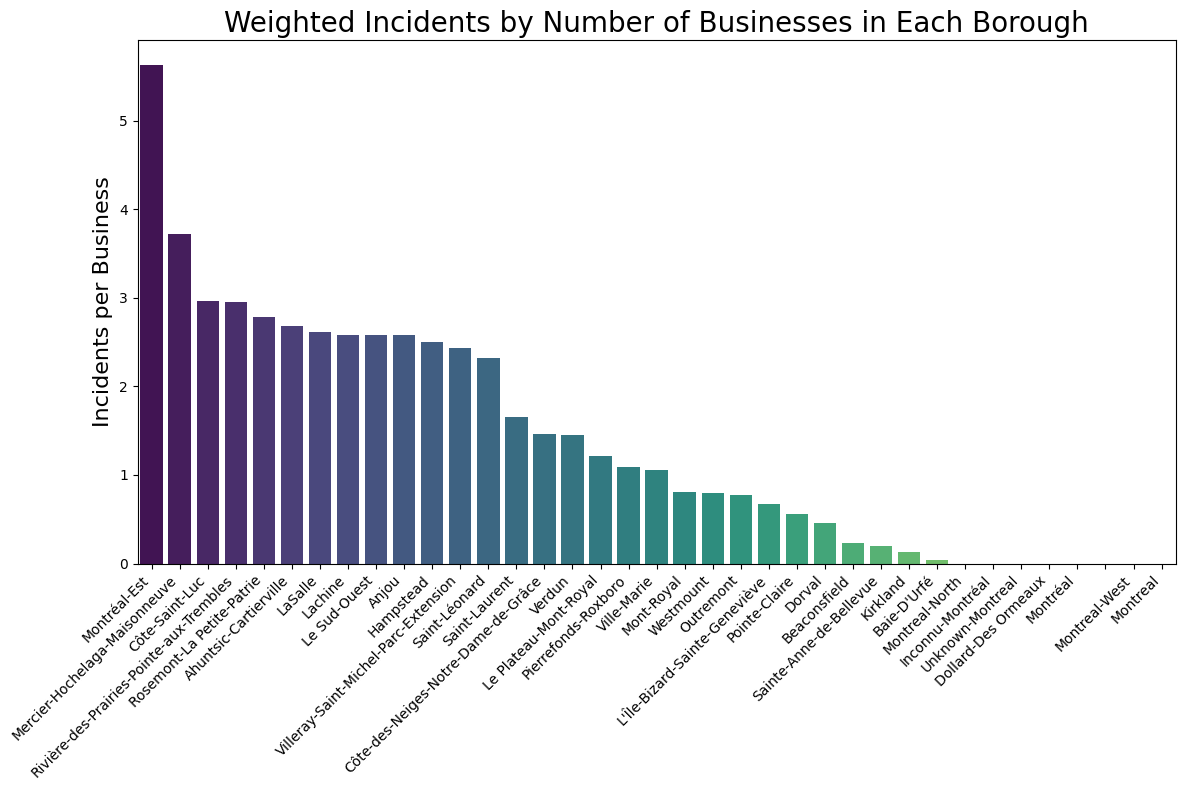

In [35]:
# Sort the data by 'Incidents_per_Business' in descending order
sorted_data = sorted_data.sort_values('Incidents_per_Business', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='NOM', y='Incidents_per_Business', data=sorted_data, palette='viridis')

# Add title, labels, and adjust ticks
plt.title('Weighted Incidents by Number of Businesses in Each Borough', size=20)
plt.xlabel('')  # Remove x-axis label for cleaner look
plt.ylabel('Incidents per Business', size=16)
plt.xticks(rotation=45, ha='right')  # Rotate tick labels for better readability

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Weighted_incidents_by_number_of_businesses_in_each_borough.svg')
plt.savefig(output_path, format='svg', dpi=300)

# Show the plot
plt.show()

In [36]:
# Filter out businesses that are categorized as 'Restaurant'
filtered_open_businesses = open_businesses_crs[open_businesses_crs['type'] != 'Restaurant']
# Create a placeholder column for analysis without restaurants
merged_data['without_restaurants'] = np.nan

In [37]:
# Perform a spatial join for non-restaurant businesses with boroughs
businesses_in_boroughs_without = gpd.sjoin(filtered_open_businesses, boroughs, how="inner", predicate='within')
# Preview the filtered businesses data
businesses_in_boroughs_without.head(5)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,...,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,Area,Area_km2
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,...,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29,5.125097e+07,51.250968
8,151,CABANE HABILE ENR.,8069 Avenue André-Ampère,Montréal,"Québec, Canada",Garderie,Ouvert,19930713,45.635397,-73.59174899999999,...,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29,5.125097e+07,51.250968
35,169,FLEUR DE PAPIER,11011 Boulevard Maurice-Duplessis,Montréal,"Québec, Canada",Garderie,Ouvert,19930308,45.666372,-73.53036,...,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29,5.125097e+07,51.250968
54,219,BOULANGERIE ET PATISSERIE LASALLE R.D.P. INC.,8591 Boulevard Maurice-Duplessis,Montréal,"Québec, Canada",Boulangerie,Ouvert,19930310,45.638303,-73.580619,...,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29,5.125097e+07,51.250968
201,2,C.P.E MARIE AUXILIATRICE ENR.,8550 Avenue Joliot-Curie,Montréal,"Québec, Canada",Garderie,Ouvert,19930603,45.639108,-73.580988,...,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29,5.125097e+07,51.250968


In [38]:
# Count non-restaurant businesses by borough
businesses_count_by_borough_without = businesses_in_boroughs_without['NOM'].value_counts()
print(businesses_count_by_borough_without)

NOM
Ville-Marie                                 613
Côte-des-Neiges-Notre-Dame-de-Grâce         399
Rosemont-La Petite-Patrie                   362
Villeray-Saint-Michel-Parc-Extension        359
Le Plateau-Mont-Royal                       345
Mercier-Hochelaga-Maisonneuve               318
Ahuntsic-Cartierville                       301
Saint-Laurent                               279
Le Sud-Ouest                                185
Saint-Léonard                               179
Rivière-des-Prairies-Pointe-aux-Trembles    155
LaSalle                                     149
Montréal-Nord                               122
Verdun                                      112
Pierrefonds-Roxboro                          96
Lachine                                      83
Anjou                                        80
Dollard-des-Ormeaux                          64
Pointe-Claire                                52
Baie-D'Urfé                                  49
Dorval                              

In [39]:
# Merge non-restaurant business counts with the main dataset
merged_data = pd.merge(merged_data, businesses_count_by_borough_without, on='NOM', how='left')
# Preview the updated dataset
merged_data.head(5)

,NOM,Number_of_incidents,Area_km2,Weighted_count_area,Number_of_businesses,Incidents_per_Business,without_restaurants,count
0,Mercier-Hochelaga-Maisonneuve,1280,27.398008,46.718724,344.0,3.720930,NaN,318.0
1,Rosemont-La Petite-Patrie,1122,15.880237,70.653857,403.0,2.784119,NaN,362.0
2,Montreal-North,1084,NaN,NaN,NaN,NaN,NaN,NaN
3,Villeray-Saint-Michel-Parc-Extension,984,16.474981,59.726929,404.0,2.435644,NaN,359.0
4,Ahuntsic-Cartierville,865,25.568442,33.830767,323.0,2.678019,NaN,301.0


In [40]:
# Drop the placeholder column for non-restaurant businesses
merged_data = merged_data.drop(columns=['without_restaurants'])
# Preview the updated dataset
merged_data.head(5)

,NOM,Number_of_incidents,Area_km2,Weighted_count_area,Number_of_businesses,Incidents_per_Business,count
0,Mercier-Hochelaga-Maisonneuve,1280,27.398008,46.718724,344.0,3.720930,318.0
1,Rosemont-La Petite-Patrie,1122,15.880237,70.653857,403.0,2.784119,362.0
2,Montreal-North,1084,NaN,NaN,NaN,NaN,NaN
3,Villeray-Saint-Michel-Parc-Extension,984,16.474981,59.726929,404.0,2.435644,359.0
4,Ahuntsic-Cartierville,865,25.568442,33.830767,323.0,2.678019,301.0


In [41]:
# Rename the column for non-restaurant business counts
merged_data.rename(columns={'count': 'without_restaurants'}, inplace=True)
# Preview the updated dataset
merged_data.head(5)

,NOM,Number_of_incidents,Area_km2,Weighted_count_area,Number_of_businesses,Incidents_per_Business,without_restaurants
0,Mercier-Hochelaga-Maisonneuve,1280,27.398008,46.718724,344.0,3.720930,318.0
1,Rosemont-La Petite-Patrie,1122,15.880237,70.653857,403.0,2.784119,362.0
2,Montreal-North,1084,NaN,NaN,NaN,NaN,NaN
3,Villeray-Saint-Michel-Parc-Extension,984,16.474981,59.726929,404.0,2.435644,359.0
4,Ahuntsic-Cartierville,865,25.568442,33.830767,323.0,2.678019,301.0


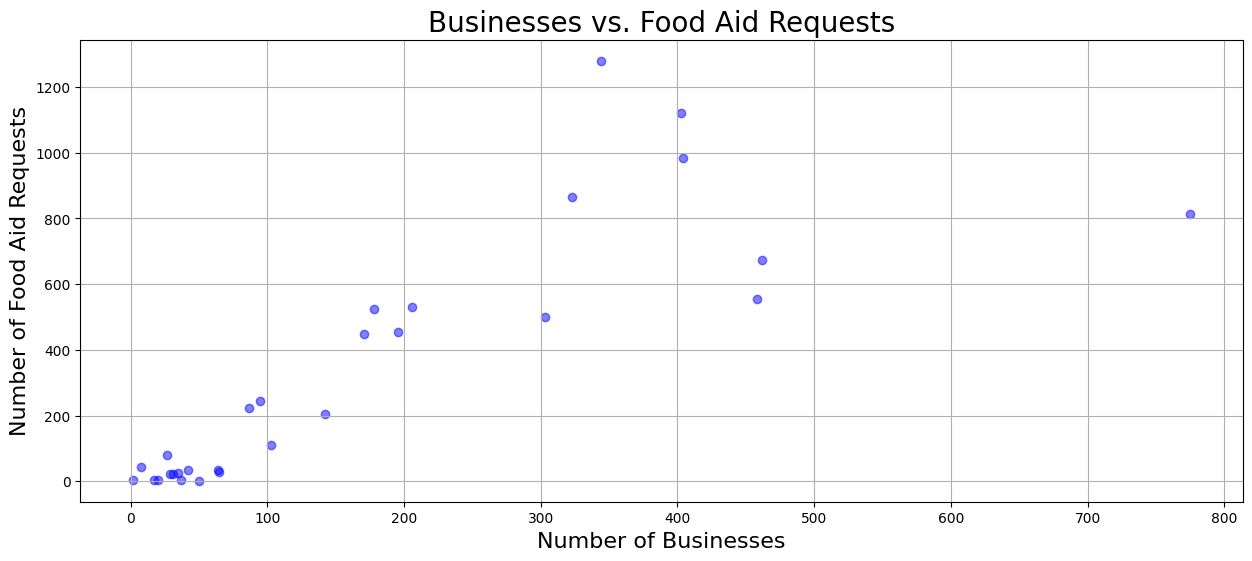

In [42]:
# Create a scatter plot to analyze the relationship between non-restaurant businesses
# and food assistance requests across boroughs.
x = merged_data['Number_of_businesses']
y = merged_data['Number_of_incidents']
borough_names = merged_data['NOM']

# Vytvoření bodového grafu
plt.figure(figsize=(15, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

# # Annotate points with borough names
# for i, name in enumerate(borough_names):
#     plt.text(x[i], y[i], name, fontsize=8, ha='right')
    
plt.title('Businesses vs. Food Aid Requests', size=20)
plt.xlabel('Number of Businesses', size=16)
plt.ylabel('Number of Food Aid Requests', size=16)
plt.grid(True)
output_path = os.path.join(output_folder, 'Businesses_vs_food_aid_requests.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

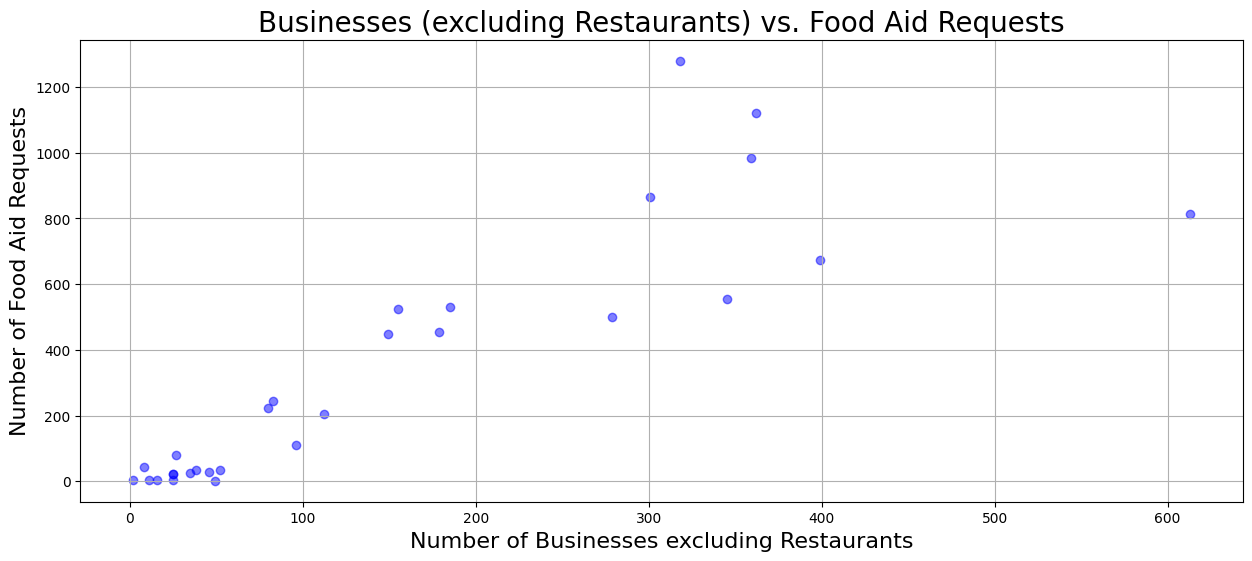

In [43]:
# Create a scatter plot to analyze the relationship between non-restaurant businesses
# and food assistance requests across boroughs.
x = merged_data['without_restaurants']
y = merged_data['Number_of_incidents']
borough_names = merged_data['NOM']

# Vytvoření bodového grafu
plt.figure(figsize=(15, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

# # Annotate points with borough names
# for i, name in enumerate(borough_names):
#     plt.text(x[i], y[i], name, fontsize=8, ha='right')
    
plt.title('Businesses (excluding Restaurants) vs. Food Aid Requests', size=20)
plt.xlabel('Number of Businesses excluding Restaurants', size=16)
plt.ylabel('Number of Food Aid Requests', size=16)
plt.grid(True)
output_path = os.path.join(output_folder, 'Businesses_excluding_restaurants_vs_food_aid_requests.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [44]:
# Merge borough geometries with merged_data for visualization
gdf = boroughs.merge(merged_data, on='NOM')

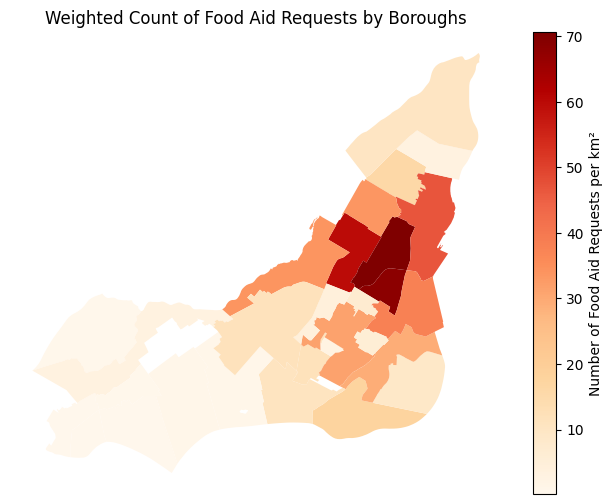

In [45]:
# Plot weighted count of incidents by borough
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(column='Weighted_count_area', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Food Aid Requests per km²"})
ax.set_title('Weighted Count of Food Aid Requests by Boroughs')
ax.set_axis_off()  # Hidden axes for cleaner visuals
output_path = os.path.join(output_folder, 'Map_food_aid_requests_by_boroughs_km2.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

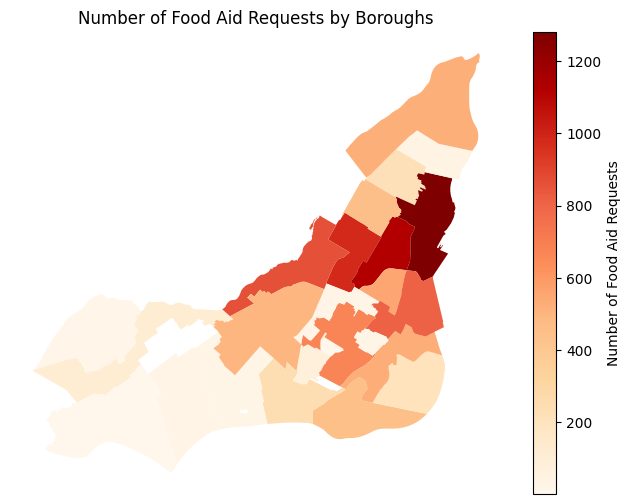

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(column='Number_of_incidents', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Food Aid Requests"})
ax.set_title('Number of Food Aid Requests by Boroughs')
ax.set_axis_off()  # Hidden axes for cleaner visuals
output_path = os.path.join(output_folder, 'Map_number_of_food_aid_requests_by_boroughs.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()